# credit card

The Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this test, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 2. Loading and Cleaning Data with Pandas [3 M]



##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [295]:
columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']


df = pd.read_csv('creditcard.txt', names=columns)
df

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000       u            g              w         v   
1        a  58.67   4.460       u            g              q         h   
2        a  24.50   0.500       u            g              q         h   
3        b  27.83   1.540       u            g              w         v   
4        b  20.17   5.625       u            g              w         v   
..     ...    ...     ...     ...          ...            ...       ...   
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0             1.25            t        t            1              f       g   
1             3.04            t        t            6              f       g   
2             1.50            t        f            0              f       g   
3             3.75            t        t            5              t       g   
4             1.71            t        f            0              f       s   
..             ...          ...      ...          ...            ...     ...   
685           1.25            f        f            0              f       g   
686           2.00            f        t            2              t       g   
687           2.00            f        t            1              t       g   
688           0.04            f        f            0              f       g   
689           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
0     00202       0              +  
1     00043     560              +  
2     00280     824              +  
3     00100       3              +  
4     00120       0              +  
..      ...     ...            ...  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -  

[690 rows x 16 columns]

In [265]:
df.shape

(690, 16)

## 2.2.  Print summary of the dataset

In [266]:
df.describe()

Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000

## 2.3. Check null values for all the colums in the dataset

In [267]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [268]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [269]:
df.replace('?', np.nan, inplace = True)


In [270]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [271]:
df['Age']=df.Age.astype('float') 
df['ZipCode']=df.Age.astype('float') 

df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

In [272]:
df.head(2)

Gender    Age  Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.00       u            g              w         v   
1      a  58.67  4.46       u            g              q         h   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   

   ZipCode  Income ApprovalStatus  
0    30.83       0              +  
1    58.67     560              +

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [273]:
X=df.iloc[:,:-1];
y=df.iloc[:,-1];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [274]:
X.shape

(690, 15)

In [275]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [276]:
X.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income  
0    30.83       0  
1    58.67     560  
2    24.50     824  
3    27.83       3  
4    20.17       0

In [277]:
n_col= X.select_dtypes(include=['int64','float64']).columns
n_col

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income'], dtype='object')

In [278]:
c_col= X.select_dtypes(include=['object']).columns
c_col


Index(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'],
      dtype='object')

In [279]:
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
transformed_mf = imp_mf.fit_transform(X)
print(transformed_mf)

[['b' 30.83 0.0 ... 'g' 30.83 0]
 ['a' 58.67 4.46 ... 'g' 58.67 560]
 ['a' 24.5 0.5 ... 'g' 24.5 824]
 ...
 ['a' 25.25 13.5 ... 'g' 25.25 1]
 ['b' 17.92 0.205 ... 'g' 17.92 750]
 ['b' 35.0 3.375 ... 'g' 35.0 0]]


In [280]:
n_index =[X.columns.get_loc(col) for col in n_col]
n_index

[1, 2, 7, 10, 13, 14]

In [281]:
c_index =[X.columns.get_loc(col) for col in c_col]
c_index

[0, 3, 4, 5, 6, 8, 9, 11, 12]

In [282]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps = [
    ('imputerN',SimpleImputer(strategy='mean')), #Handline numeric missing value with median
    ('scaler',StandardScaler()) #Normalize the data
] )

In [283]:
#Building the Numeric Transformation Pipeline
c_transformer = Pipeline(steps = [
    ('imputerC',SimpleImputer(strategy='most_frequent')), #Handline categorical missing value with median
    ('onehot',OneHotEncoder(handle_unknown='ignore')) #Normalize the data
] )

In [284]:
#first
from sklearn.compose import ColumnTransformer
pre = ColumnTransformer(transformers=[
    ('numerical',n_transformer,n_index),
    ('categrical',c_transformer,c_index)
])

# creating model

In [285]:
estimator=LogisticRegression()

In [286]:
mymodel = Pipeline(steps=[
    ('preprocessing',pre),
    ('ext',estimator)
])

In [287]:
#from sklearn import set_config
#set_config(display='diagram')
mymodel.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 7, 10, 13, 14]),
                                                 ('categrical',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3, 4, 5

In [288]:
mymodel.score(X_test,y_test)

0.8695652173913043

In [289]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [290]:
y_pred = mymodel.predict(X_test)
print(y_pred)

['-' '-' '+' '+' '-' '-' '+' '+' '-' '-' '-' '-' '+' '-' '-' '-' '-' '+'
 '+' '-' '-' '-' '+' '+' '+' '-' '+' '-' '+' '-' '+' '-' '+' '-' '+' '-'
 '-' '+' '+' '+' '+' '-' '-' '-' '+' '-' '-' '+' '-' '-' '-' '-' '-' '-'
 '+' '-' '-' '-' '+' '-' '+' '-' '-' '+' '-' '+' '-' '+' '-' '-' '+' '+'
 '-' '+' '-' '+' '+' '-' '-' '+' '+' '-' '+' '+' '+' '+' '+' '+' '-' '+'
 '-' '-' '+' '-' '-' '-' '-' '+' '+' '+' '+' '+' '-' '-' '+' '-' '+' '-'
 '+' '-' '+' '+' '-' '-' '+' '+' '-' '-' '-' '+' '-' '-' '-' '-' '-' '+'
 '+' '-' '+' '+' '+' '-' '+' '+' '-' '-' '+' '-']


Report : 
              precision    recall  f1-score   support

           +       0.83      0.88      0.85        59
           -       0.91      0.86      0.88        79

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



<AxesSubplot:>

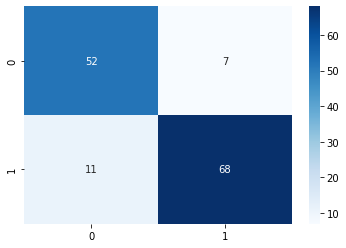

In [291]:
#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['+','-'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [292]:
#Save Model using pickle
import pickle
pickle.dump(mymodel, open("mymodel.pkl","wb")) 

In [293]:
#load pickle model
model = pickle.load(open("mymodel.pkl","rb"))
model 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 7, 10, 13, 14]),
                                                 ('categrical',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3, 4, 5

In [294]:
import sklearn
sklearn.__version__

'1.0.2'